In [68]:
import os
import time
import pandas as pd
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait as WDW
from selenium.webdriver.support import expected_conditions as EC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from underthesea import word_tokenize
from xlrd import open_workbook
import matplotlib.pyplot as plt

In [69]:
print(os.path.exists('./chromedriver.exe')) 

True


In [70]:
# Create ChromeDriver to executable that Selenium WebDriver uses to control Chrome
def ChromeDriver(url,t):
    data = []
    service = Service(executable_path=r'D:\hoctrentruong\DAT\project\Emotion-Regconition-Youtube-main\Emotion-Regconition-Youtube-main/chromedriver.exe')
    with Chrome(service=service) as ChD:
        wait = WDW(ChD,t)
        ChD.get(url)
        for item in range(101): 
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
            time.sleep(t)
        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
            if(len(str(comment.text))>10): # Do not accept short comment or doesn't mean much
                data.append(comment.text)
            if(len(data)==103): # 100 comments + 3(title,description,first comment of Khoa Pug)
                break
    return data

def getData_Video(url,t):
    data = ChromeDriver(url,t)
    while(len(data)==103):
        for i in range(3): # Remove 3(title,description,first comment of Khoa Pug)
            data.pop(0)
        print("Success!! Crawled 100 comments from Video [" + url.split("v=")[1] + "]!")
        return data
    print("Failed!! Please try again.")
    return data

In [71]:
url1 = "https://www.youtube.com/watch?v=hassqXTvsXM"
url2 = "https://www.youtube.com/watch?v=RG-dXrbRNuw"
url3 = "https://www.youtube.com/watch?v=ipSpPzFqNH0"
url4 = "https://www.youtube.com/watch?v=_cKeLsxwRSU"
url5 = "https://www.youtube.com/watch?v=4CAQ4odYfhI"

storageDir = "data1/"
if not os.path.exists(storageDir):
    os.makedirs(storageDir)

In [72]:
df1 = getData_Video(url1, 0.035)

Success!! Crawled 100 comments from Video [hassqXTvsXM]!


In [73]:
df2 = getData_Video(url2, 0.035)

Success!! Crawled 100 comments from Video [RG-dXrbRNuw]!


In [74]:
df3 = getData_Video(url3,0.035)

Success!! Crawled 100 comments from Video [ipSpPzFqNH0]!


In [75]:
df4 = getData_Video(url4,0.035)

Success!! Crawled 100 comments from Video [_cKeLsxwRSU]!


In [76]:
df5 = getData_Video(url5,0.035)

Success!! Crawled 100 comments from Video [4CAQ4odYfhI]!


In [77]:
df1_df = pd.DataFrame({'Sentence': df1})
df2_df = pd.DataFrame({'Sentence': df2})
df3_df = pd.DataFrame({'Sentence': df3})
df4_df = pd.DataFrame({'Sentence': df4})
df5_df = pd.DataFrame({'Sentence': df5})

# Lưu từng file vào folder data1/
df1_df.to_csv('data1/comments_video1.csv', index=False, encoding='utf-8-sig')
df2_df.to_csv('data1/comments_video2.csv', index=False, encoding='utf-8-sig')
df3_df.to_csv('data1/comments_video3.csv', index=False, encoding='utf-8-sig')
df4_df.to_csv('data1/comments_video4.csv', index=False, encoding='utf-8-sig')
df5_df.to_csv('data1/comments_video5.csv', index=False, encoding='utf-8-sig')

In [78]:
DG = "Disgust"
EJ = "Enjoyment"
AG = "Anger"
SP = "Surprise"
SN = "Sadness"
FE = "Fear"
HU = "Hurt"
LO = "Lonely"
HP = "Hopeless"
SPAM = "Spam"
DS = "Dissappointed"
AC = "Accepting"
IN = "Indifferent"
HN = "Highly negative"
OT = "Other"

In [79]:
emotion_keywords = {
    EJ: ["vui", "hay", "tuyệt", "cười", "vỗ tay", "đỉnh", "thích"],
    SN: ["buồn", "khóc", "tâm trạng", "tủi", "chán", "rơi lệ"],
    AG: ["tức", "giận", "bực", "ức chế", "cay", "nóng máu"],
    SP: ["ngạc nhiên", "bất ngờ", "wow", "trời ơi", "sốc"],
    DG: ["ghê", "kinh", "khó chịu", "rùng mình", "ghét"],
    FE: ["sợ", "hoảng", "hốt", "rùng mình", "lo lắng"],
    HU: ["đau", "tổn thương", "nhói", "buốt"],
    LO: ["cô đơn", "lạc lõng", "trống vắng"],
    HP: ["tuyệt vọng", "mất hết", "không lối thoát"],
    SPAM: ["mua ngay", "quảng cáo", "link", "http", "sub chéo"],
    DS: ["thất vọng", "chán thật", "không như mong đợi"],
    AC: ["chấp nhận", "cũng được", "ok", "ổn mà"],
    IN: ["bình thường", "không quan tâm", "chả sao", "meh"],
    HN: ["tệ", "kinh khủng", "đáng sợ", "cực kỳ tệ"],
    OT: []  # Mặc định nếu không match từ nào
}


In [80]:
def detect_emotion(comment, emotion_keywords):
    comment_lower = comment.lower()
    for label, keywords in emotion_keywords.items():
        for kw in keywords:
            if kw in comment_lower:
                return label
    return OT

In [82]:
import os
import pandas as pd

input_folder = 'data1'
output_folder = 'emotion1'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

filenames = [
    'comments_video1.csv',
    'comments_video2.csv',
    'comments_video3.csv',
    'comments_video4.csv',
    'comments_video5.csv',
    'data6.csv'
]

# Loop qua các file
for file in filenames:
    df = pd.read_csv(os.path.join(input_folder, file))
    df['Emotion'] = df['Sentence'].apply(lambda x: detect_emotion(str(x), emotion_keywords))
    df.to_csv(os.path.join(output_folder, file), index=False, encoding='utf-8-sig')

print("Đã tự động gán nhãn Emotion và lưu lại trong 'emotion1/'")

Đã tự động gán nhãn Emotion và lưu lại trong 'emotion1/'


In [83]:
storageDir = "emotion1/"  # Hoặc 'data1/' nếu chưa gán nhãn

dataList1 = pd.read_csv(storageDir + "comments_video1.csv", encoding="utf8")
dataList2 = pd.read_csv(storageDir + "comments_video2.csv", encoding="utf8")
dataList3 = pd.read_csv(storageDir + "comments_video3.csv", encoding="utf8")
dataList4 = pd.read_csv(storageDir + "comments_video4.csv", encoding="utf8")
dataList5 = pd.read_csv(storageDir + "comments_video5.csv", encoding="utf8")
dataList6 = pd.read_csv(storageDir + "data6.csv", encoding="utf8")


In [84]:
for df in [dataList1, dataList2, dataList3]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

In [86]:
dataList1["Length"] = dataList1["Sentence"].astype(str).apply(len)
dataList2["Length"] = dataList2["Sentence"].astype(str).apply(len)
dataList3["Length"] = dataList3["Sentence"].astype(str).apply(len)
dataList4["Length"] = dataList3["Sentence"].astype(str).apply(len)
dataList5["Length"] = dataList3["Sentence"].astype(str).apply(len)
dataList6["Length"] = dataList3["Sentence"].astype(str).apply(len)

# Xem thử kết quả
dataList1.head()

,Sentence,Emotion,Length
0,thích nhất cái khoản anh Khoa đi đâu cũng giới...,Enjoyment,163
1,Hay quá Khoa ơi nhiều người như Em sẽ làm ngườ...,Enjoyment,76
2,Khuôn mặt thân thiện hiền lành vui vẽ. ..làm đ...,Enjoyment,197
3,Những nhà hàng bên Ai Cập rất thích quay vì họ...,Enjoyment,145
4,Không biết diễn tả sao lun.. Mỗi khi a ra clip...,Enjoyment,69


In [87]:
dataList2.head()

,Sentence,Emotion,Length
0,"Mình rất thích xem teppanyaki kiểu này , phong...",Enjoyment,125
1,T mắc cười khúc đầu bếp chào xong cái ông Khoa...,Enjoyment,99
2,ăn không biết sao mà nhìn họ làm thấy ngon quá...,Other,85
3,"Ăn ở VN cũng rất ngon, giúp xứ sở, dân mình c...",Other,57
4,Coi vd mà không ai khen anh đầu bếp vậy ta. Mì...,Other,132


In [88]:
dataList3.head()

,Sentence,Emotion,Length
0,"ở ấn độ có người nhiễm cúm corona rồi đó, ko t...",Other,150
1,Năm 2014 tôi được tổng cty cho đi chuyến tập h...,Enjoyment,2811
2,"Khoa có hai cô bạn thật dễ thương, cô nào cũng...",Other,246
3,"Xem những hình ảnh này, rồi cả những gì họ hứn...",Other,218
4,"Xem xong tôi thấy tổ quốc ta vẫn tuyệt vời, r...",Enjoyment,84


In [89]:
dataList4.head()

,Sentence,Emotion,Length
0,Không phải ai cô đơn cũng yếu đuối – có những ...,Enjoyment,150
1,"Mình ko ham danh, lợi nhưng mình thích sống 1 ...",Enjoyment,2811
2,Có một khoảng thời gian sau chia tay: Mình thậ...,Fear,246
3,"Sau nhiều biến cố trong đời, tôi yêu thích sự ...",Enjoyment,218
4,"Có thời gian mình thật sự rất cô đơn, mình ngh...",Enjoyment,84


In [90]:
dataList5.head()

,Sentence,Emotion,Length
0,mùa hè cuối cùng của thời học sinh . Từng con ...,Other,150
1,năm nay thi tuyển sinh 10 - 1 kì thi qtrong nh...,Enjoyment,2811
2,“Nếu có ước muốn trong cuộc đời này. Hãy nhớ ư...,Other,246
3,Đọc tiêu đề video mà tim nhói đau. Có hai mùa ...,Enjoyment,218
4,Gửi đến tôi mùa hè của một năm nữa - mùa hè cu...,Enjoyment,84


In [91]:
dataList6.head()

,Sentence,Emotion,Length
0,Mình mất cha từ 10 tuổi cái tuổi còn quá bé nh...,Hurt,150.0
1,Nghe bai hat nay toi nho cha toi vo cung. Cha ...,Other,2811.0
2,Dù đúng hay sai Dù vui hay buồn Gần gũi hay hờ...,Enjoyment,246.0
3,"Lời bài hát thật sâu sắc , nặng tình nghĩa cha...",Other,218.0
4,Nghe bài hát . này mình lại nhớ đến cha .Cha m...,Sadness,84.0


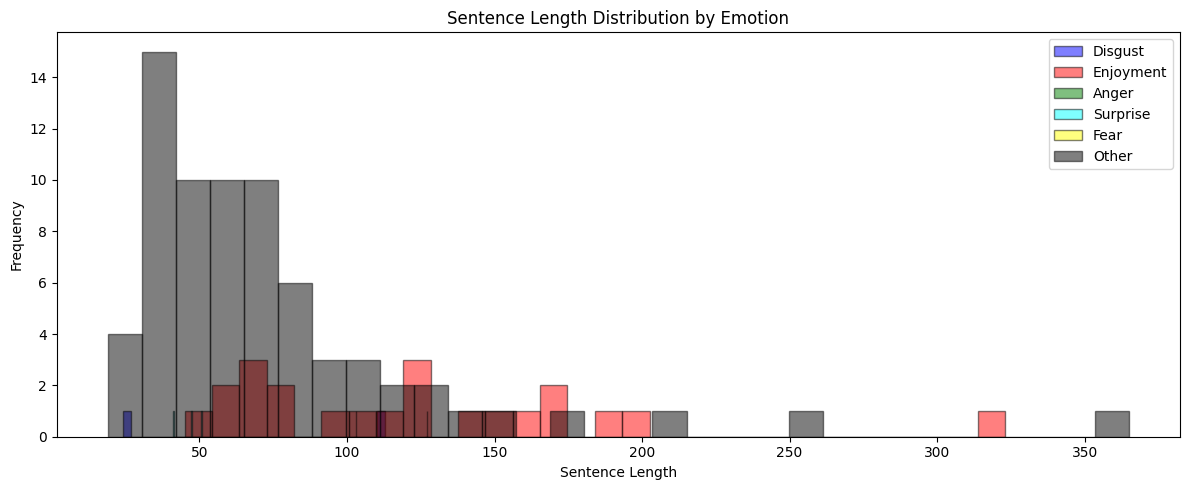

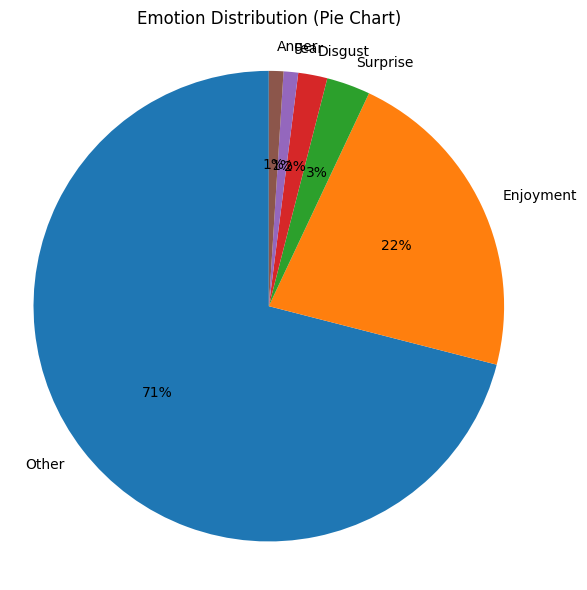

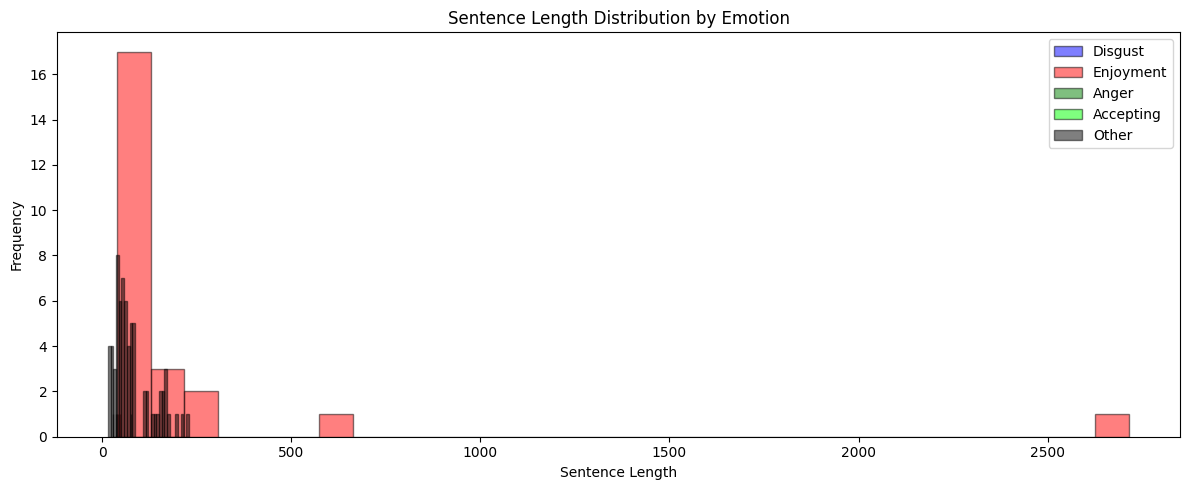

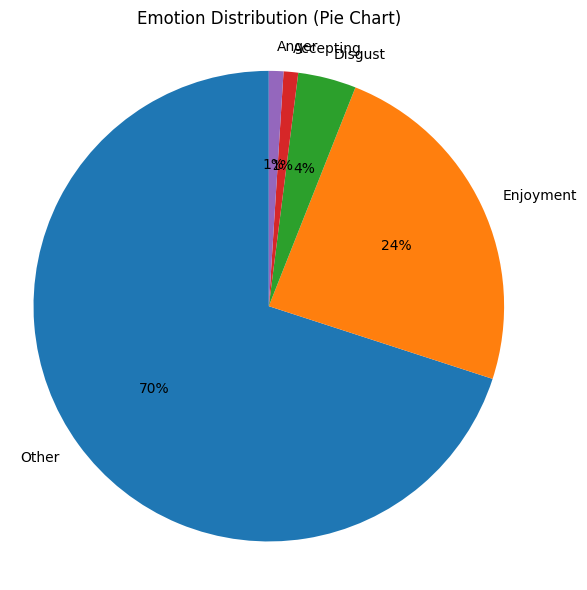

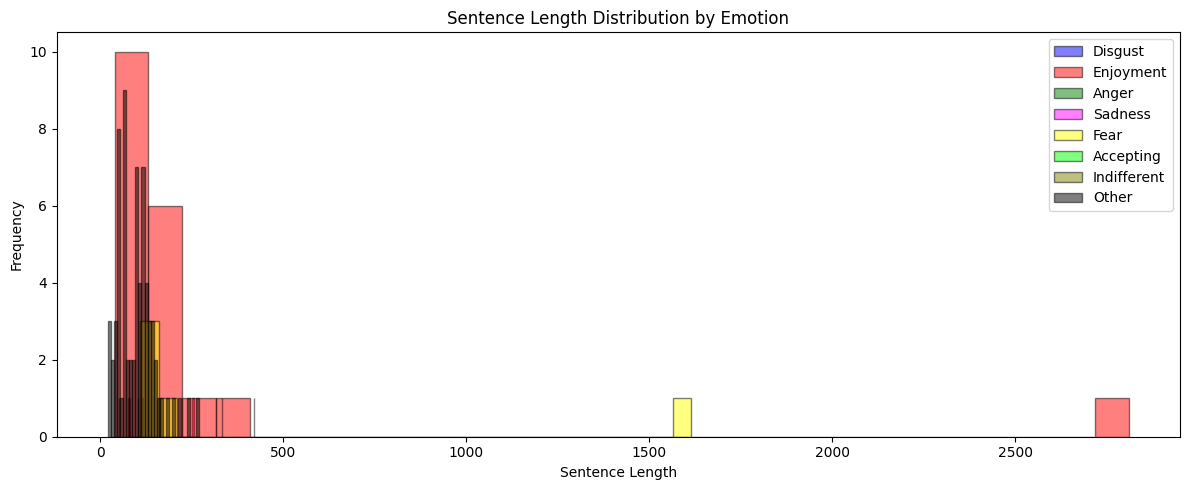

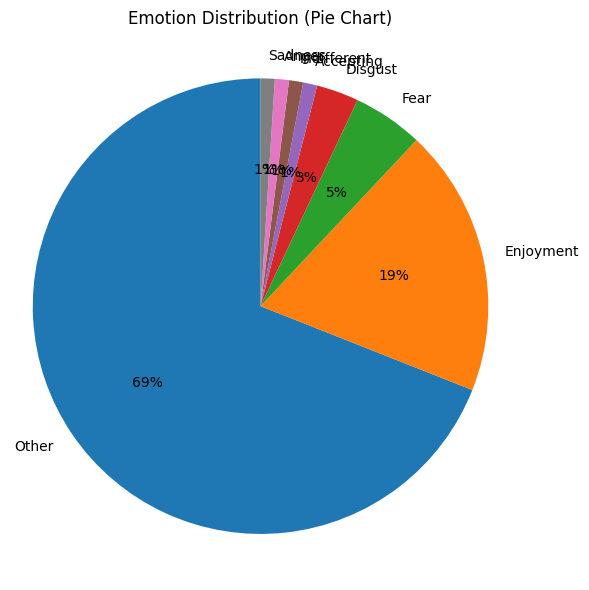

In [92]:
def Show_HistGraph_And_PieChart(data):
    emotion_dict = {
        "DG": "Disgust",
        "EJ": "Enjoyment",
        "AG": "Anger",
        "SP": "Surprise",
        "SN": "Sadness",
        "FE": "Fear",
        "HU": "Hurt",
        "LO": "Lonely",
        "HP": "Hopeless",
        "SPAM": "Spam",
        "DS": "Dissappointed",
        "AC": "Accepting",
        "IN": "Indifferent",
        "HN": "Highly negative",
        "OT": "Other"
    }

    # Đảm bảo cột Length tồn tại
    if 'Length' not in data.columns:
        data['Length'] = data['Utterance'].apply(lambda x: len(str(x).split()))

    # Nếu nhãn là dài (Disgust, Enjoyment...), ta chuyển về mã ngắn
    reverse_emotion_dict = {v: k for k, v in emotion_dict.items()}
    data['Emotion'] = data['Emotion'].map(reverse_emotion_dict)

    config = dict(alpha=0.5, bins=30, edgecolor="black")
    colors = [
        'blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'orange', 'purple',
        'brown', 'grey', 'pink', 'lime', 'olive', 'navy', 'black'
    ]

    plt.figure(figsize=(12, 5))

    for i, (key, label) in enumerate(emotion_dict.items()):
        emotion_lengths = data.loc[data.Emotion == key, 'Length']
        if not emotion_lengths.empty:
            plt.hist(emotion_lengths, **config, color=colors[i % len(colors)], label=label)

    plt.title('Sentence Length Distribution by Emotion')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Pie chart
    emotion_counts = data['Emotion'].value_counts()
    labels = [emotion_dict.get(k, k) for k in emotion_counts.index]
    plt.figure(figsize=(6, 6))
    plt.pie(emotion_counts, labels=labels, autopct='%1.0f%%', startangle=90)
    plt.title("Emotion Distribution (Pie Chart)")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Show_HistGraph_And_PieChart(dataList1)
Show_HistGraph_And_PieChart(dataList2)
Show_HistGraph_And_PieChart(dataList3)

In [93]:
dataTrainUIT = pd.read_excel("UIT-VSMEC/train_nor_811.xlsx", engine='openpyxl')
dataValidUIT = pd.read_excel("UIT-VSMEC/valid_nor_811.xlsx", engine='openpyxl')
data_TestUIT = pd.read_excel("UIT-VSMEC/test_nor_811.xlsx", engine='openpyxl')

# Model
model = DecisionTreeClassifier()

# Y
trainY = dataTrainUIT.Emotion
validY = dataValidUIT.Emotion
testY  = data_TestUIT.Emotion

In [96]:
def text_process(datasets):
    # Stopwords
    StopWords = [
        'chs','cerrrr','aaaaa','aaaaaaa','aamir','abcxyz','ac','18','200','500','dek','thg','đg','đs','đm','đuma',
        'vl','vcl','kkk','dcm','cu','ừm','đĩ','đụ','địt','xl','lol','01','10','100', '11','12','13','14','15','150',
        '17','1700''1967','20','21','22','225','23','24','25','26','28','2_','2_3','30','300','3000','320','333',
        '33333','40','400','42','45','48', '50','5000','580','60','63','66','75','78','80','800','81','850','90','900',
        '99','99999','_200','_5','ah','bn','c3','chg','cp','dòg','hlin','lòn','lôz','tđ','đkm','đkmm','đmaaaa','đmm',
        'đmmmmm','đỹ','vcb','vclll','đụ_mẹ','trươ','trưen','amir','ga','1700','1967','bg','chaiii','clm','cmm','cmnl','cã',
        'hloz','imdb','kau','kbh','loz','lozzz','lozzzz','matlon','muô','nh','nhma','p30','16','250','56','adm','ngươ'
    ]
    Tfidf = TfidfVectorizer(stop_words = StopWords)
    
    WordSeg = []
    for i in range(datasets.shape[0]):
        sentence_strip = datasets.Sentence[i].strip()
        WordSeg.append(word_tokenize(sentence_strip, format='text'))
    datasets.Sentence = WordSeg
    
    X = Tfidf.fit_transform(datasets.Sentence)
    print(Tfidf.get_feature_names_out())
    print("\n\n")
    return X

In [97]:
trainY = dataTrainUIT["Emotion"]
validY = dataValidUIT["Emotion"]

trainValidX = pd.concat([dataTrainUIT, dataValidUIT]).reset_index(drop=True)
trainValidX = text_process(trainValidX)
trainValidY = pd.concat([trainY, validY]).reset_index(drop=True)

trainX, testX, trainY, testY = train_test_split(trainValidX, trainValidY, test_size=0.33, random_state=42)
model = model.fit(trainX, trainY)
predY = model.predict(testX)

['2000' '2012' '2015' ... 'ức_chế' 'ứng' 'ứng_dụng']





In [98]:
Accuracy  = []
Precision = []
F1_Score  = []

Accuracy.append(accuracy_score(testY, predY))
F1_Score.append(f1_score(testY, predY, average='weighted'))  # Could change to None,'weighted','micro','macro'
Precision.append(precision_score(testY, predY, average='weighted'))

averageAccuracy = sum(Accuracy)/len(Accuracy)
print("Average of Accuracy:", averageAccuracy)
averageF1_Score = sum(F1_Score)/len(F1_Score)
print("Average of F1_Score:", averageF1_Score)
averagePrecision = sum(Precision)/len(Precision)
print("Average of Precision:", averagePrecision)

Average of Accuracy: 0.3551992225461613
Average of F1_Score: 0.35314298817438555
Average of Precision: 0.3528009874835016


In [99]:
print(dataList1.head())
print(dataList1.columns)

                                            Sentence Emotion  Length
0  thích nhất cái khoản anh Khoa đi đâu cũng giới...      EJ     163
1  Hay quá Khoa ơi nhiều người như Em sẽ làm ngườ...      EJ      76
2  Khuôn mặt thân thiện hiền lành vui vẽ. ..làm đ...      EJ     197
3  Những nhà hàng bên Ai Cập rất thích quay vì họ...      EJ     145
4  Không biết diễn tả sao lun.. Mỗi khi a ra clip...      EJ      69
Index(['Sentence', 'Emotion', 'Length'], dtype='object')


In [100]:
dataListY1 = dataList1.Emotion
dataListY2 = dataList2.Emotion
dataListY3 = dataList3.Emotion

dataListX1 = text_process(dataList1)
trainX1, testX1, trainY1, testY1 = train_test_split(dataListX1, dataListY1, test_size=0.33, random_state=42)
model = model.fit(trainX1, trainY1)
predY1 = model.predict(testX1)

dataListX2 = text_process(dataList2)
trainX2, testX2, trainY2, testY2 = train_test_split(dataListX2, dataListY2, test_size=0.33, random_state=42)
model = model.fit(trainX2, trainY2)
predY2 = model.predict(testX2)

dataListX3 = text_process(dataList3)
trainX3, testX3, trainY3, testY3 = train_test_split(dataListX3, dataListY3, test_size=0.33, random_state=42)
model = model.fit(trainX3, trainY3)
predY3 = model.predict(testX3)

['00' '09' '19' '27' '29' '32' '33' '43' '47' '6_tr' '_good' '_t' 'a_em'
 'a_khoa' 'ae' 'ah_khoa' 'ahhah' 'ai' 'ai_cập' 'anh' 'anh_chị' 'anh_cả'
 'anh_khoa' 'aroma' 'ban_đêm' 'bao' 'bay' 'bean_nhỉ' 'biết' 'blogger' 'bo'
 'buồn_cười' 'bà' 'bán' 'bát' 'bên' 'bình_dân' 'bình_luận' 'bò' 'bóng'
 'bạn' 'bả_la' 'bảo_tàng' 'bấm' 'bất_cứ' 'bất_kì' 'bật' 'bắt_đầu' 'bể'
 'bể_bụng' 'bị' 'bỏ_lỡ' 'bồi' 'bồi_bàn' 'bờ' 'bởi_vậy' 'bữa' 'cai_chất'
 'camera' 'cameraman' 'cameramen' 'cao' 'cao_cấp' 'caramen' 'chai'
 'chiến_tranh' 'cho' 'cho_phép' 'chu_chu' 'chua' 'chung_clip' 'chuyến'
 'chuẩn' 'chào_khoa' 'cháu' 'chém' 'chén' 'chê' 'chú' 'chúc' 'chúc_khoa'
 'chơi' 'chưa' 'chạy' 'chảnh' 'chắc' 'chết' 'chỉ' 'chị' 'chịu' 'chổ' 'chủ'
 'chứ' 'chừng' 'clip' 'clip_khoa' 'clips' 'cmt' 'coi' 'coi_video'
 'comment' 'con' 'con_người' 'cua' 'cute' 'cuối' 'cuối_cùng' 'cuốn'
 'cuộc_sống' 'càng_ngày_càng' 'cá' 'cá_cảnh' 'cá_kìa' 'các' 'cách' 'cái'
 'cân_nhắc' 'câu' 'còn' 'có' 'có_thể' 'cô' 'công_nhận' 'công_phượng'
 'cù

In [101]:
Accuracy1  = []
Precision1 = []
F1_Score1  = []

Accuracy1.append(accuracy_score(testY1, predY1))
F1_Score1.append(f1_score(testY1, predY1, average='micro'))  # Could change to None,'weighted','micro','macro'
Precision1.append(precision_score(testY1, predY1, average='micro'))

averageAccuracy1 = sum(Accuracy1)/len(Accuracy1)
print("Average of Accuracy 1:", averageAccuracy1)
averageF1_Score1 = sum(F1_Score1)/len(F1_Score1)
print("Average of F1_Score 1:", averageF1_Score1)
averagePrecision1 = sum(Precision1)/len(Precision1)
print("Average of Precision 1:", averagePrecision1)

Accuracy2  = []
Precision2 = []
F1_Score2  = []

Accuracy2.append(accuracy_score(testY2, predY2))
F1_Score2.append(f1_score(testY2, predY2, average='micro'))  # Could change to None,'weighted','micro','macro'
Precision2.append(precision_score(testY2, predY2, average='micro'))

averageAccuracy2 = sum(Accuracy2)/len(Accuracy2)
print("Average of Accuracy 2:", averageAccuracy2)
averageF1_Score2 = sum(F1_Score2)/len(F1_Score2)
print("Average of F1_Score 2:", averageF1_Score2)
averagePrecision2 = sum(Precision2)/len(Precision2)
print("Average of Precision 2:", averagePrecision2)

Accuracy3  = []
Precision3 = []
F1_Score3  = []

Accuracy3.append(accuracy_score(testY3, predY3))
F1_Score3.append(f1_score(testY3, predY3, average='micro'))  # Could change to None,'weighted','micro','macro'
Precision3.append(precision_score(testY3, predY3, average='micro'))

averageAccuracy3 = sum(Accuracy3)/len(Accuracy3)
print("Average of Accuracy 3:", averageAccuracy2)
averageF1_Score3 = sum(F1_Score3)/len(F1_Score3)
print("Average of F1_Score 3:", averageF1_Score3)
averagePrecision3 = sum(Precision3)/len(Precision3)
print("Average of Precision 3:", averagePrecision3)

Average of Accuracy 1: 0.7878787878787878
Average of F1_Score 1: 0.7878787878787878
Average of Precision 1: 0.7878787878787878
Average of Accuracy 2: 0.6666666666666666
Average of F1_Score 2: 0.6666666666666666
Average of Precision 2: 0.6666666666666666
Average of Accuracy 3: 0.6666666666666666
Average of F1_Score 3: 0.7272727272727273
Average of Precision 3: 0.7272727272727273
